# Tema 0. Estadística descriptiva

En la jerga de DS por *variable* vamos a entender la medición de una *característica* o *atributo*. Ejemplos de variables son: edad, peso, longitud, latitud, precio, ingreso, etc.

## Clasificaciones de variables

Las variables pueden ser clasificadas por su representación numérica, o por cómo son *medidas* (es decir, cómo son asignados números a los atributos de acuerdo a una regla, su escala de medición). Las variables también pueden ser clasificadas de acuerdo a cómo están asociadas unas con otras. 

---

Esta es una clasificación de acuerdo a su representación numérica. Las variables discretas son contables infintas (pueden sear asignados números naturales $\mathbb{N}=\{1, 2, 3, \dots\}$). Las variables continuas son incontables infinitas (pueden ser asignadas a los números reales $\mathbb{R}$).

<figure>
<p align="center">
  <img src="img/variable_types.png" width='50%' />
      <figcaption>
      <p align="center"> Tipos de variables (tomada de OpenInstro Statistics)</p>
      </figcaption>
</p>
</figure>

Las variables categóricas podrían considerarse un tipo de variable discreta, pero no es del todo cierto. Las variables categóricas no tienen porqué seguir un orden en particular ni ser asignadas a un subconjunto de números. Por ejemplo, la variable sexo puede ser tan bien representada por (0, 1) como por (1, 2). La variable ordinal Nivel educativo puede ser tan bien representada con (0, 1, 2, 3) como por (1,2, 3, 4) etc.

---

De acuerdo a su nivel de medición, pueden ser clasificadas como nominales, ordinales, de intervalo y de razón. 

Las **variables con escala nominal** no tienen una correspondencia numérica específica. Se les asignan números solo para identificarlas. Las operaciones aritméticas de suma, resta, multiplicación, división, etc, no tienen sentido, porque el número que se les asigna no implica más o menos cantidad de su atributo. La única operación permitida es la de conteo, su estadística descriptiva se hace con frecuencias y porcentajes.

Las **variables en escala ordinal** tampoco tienen una correspondencia, siempre y cuando sean asignados valores que preserven el orden de rango. No pueden describir grados de diferencia ni magnitud relativa entre dos observaciones con diferente orden. Por ejemplo, Alberto califica de bueno un libro que Luis calificó con de malo en una escala de $\{\text{pésimo, malo, regular, bueno, excelente}\}$. No podemos decir que el libro fue doblemente bueno para Alberto que para Luis. También se pueden describir con frecuencias y porcentajes, pero además con mediana y rango.

Las **las variables en escala de intervalo** sí tienen una correspondencia precisa que debe preservar orden y magnitud. Se puede sumar y restar con valores en esta escala, pero no dividir ni multiplicar. El 0 es arbitrario (como en los grados Celcius) por lo que un 0 no implica ausencia del atributo, y no se puede decir que 20 °C es el doble de caliente que 10 °C. Todo intervalo en una escala de intervalo es igual que otro intervalo en la escala: $15-10=30 - 25$. Sus estadísticos descriptivos son media, desviación estándar, varianza (y por extensión mediana y rango).

Las **variables en escala de razón** tienen todas las propiedades de las intervalares (conservan orden y magnitud), además de un 0 verdadero, en el que el 0 sí significa una ausencia de magnitud. Se puede sumar, restar, dividir y multiplicar en estas escalas. Pueden expresar magnitudes relativas (e.g., 4 metros es el doble de 2 metros). Sus estadísticos descriptivos, además de media, desviación estándar, varianza, mediana y rango, son la media geométrica, coeficiente de variación.

## Estadísticos descriptivos

La estadística se divide clásicamente en dos grandes ramas: la descriptiva y la inferencial (a su vez en estimación y prueba de hipótesis). La estadística descriptiva se ocupa de resumir y visualizar los datos, mientras que la inferencial se ocupa de hacer inferencias sobre la población a partir de una muestra. Existen dos tipos de estadísticos descriptivos: los de locación y los de dispersión.

### De locación

Encontrar valores típicos o centrales que describan bien los datos.

- Media: $\bar Y = \sum_{i=1}^N Y_i/N$
- Mediana: $\tilde{Y} = Y_{[N+1]/2}$ si $N$ es impar; $\tilde{Y} = (Y_{[N]/2} + Y_{[N/2 + 1]})/2$ si $N$ es par.
- Moda: el valor más frecuente en los datos. No siempre existe, y puede haber más de una moda.



### De dispersión

- Rango intercuartílico, IQR: $Q_3 - Q_1$. 
- Varianza: $s^2=\frac{1}{n-1}\sum_{i=1}^n (y_i - \bar y)^2$
- Desviación estándar: $s = \sqrt{s}$,
- Desviación media absoluta: $\text{MAD} = \frac{1}{n-1}\sum_{i=1}^n \mid y_i - \bar y\mid$
- Rango: $\max(y) - \min(y)$

En las siguientes celdas vamos a calcular estos estadísticos en Python. Para instalar Python, recomiendo la distribución Anaconda, que incluye Jupyter Notebook, Python y muchas librerías de análisis de datos. 

1. Para instalar Anaconda, sigan las instrucciones [aquí](https://github.com/jealcalat/python4da/blob/main/intro.md).
2. Para empezar a usar Jupyter Notebook, sigan las instrucciones [aquí](https://www.youtube.com/watch?v=Xws9V34-CFo&ab_channel=PabloPaniagua), y para una introducción muy básica a lo que necesitaremos de Python, consulta [aquí](https://github.com/jealcalat/python4da/blob/main/nbs/pt1_intro_python.ipynb).
3. El uso de las librerías NumPy, Pandas y Matplotlib se explica [aquí](https://github.com/jealcalat/python4da/blob/main/nbs/pt2_numpy-pandas-matplotlib.ipynb).


In [28]:
import pandas as pd
import seaborn as sns
from collections import Counter

# media
def mean_fun(x):
    return sum(x) / len(x)

# mediana
def median_fun(x):
    x.sort()
    N = len(x)
    if N % 2 == 0:
        return (x[int(N / 2)] + x[int((N - 1) / 2)]) / 2
    else:
        return x[int((N - 1) / 2)]

# moda
def mode_fun(x):
    n = len(x)
    data = Counter(x)
    get_mode = dict(data)
    mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]
    return mode[0]

# varianza
def var_fun(x):
    n = len(x)
    mean_x = sum(x) / n
    return sum([(i - mean_x) ** 2 for i in x]) / (n - 1)

# desviación estándar

def std_fun(x):
    var_x = var_fun(x)
    return var_x ** 0.5

# desviación absoluta media
def mad_fun(x):
    n = len(x)
    mean_x = sum(x) / n
    ab_dev = [abs(i - mean_x) for i in x]
    return (1/n) * sum(ab_dev)

# rango

def range_fun(x):
    x.sort() # ordena la lista de menor a mayor
    return x[-1] - x[0]



Ejercicio:

$x=(9, 10, 11, 11, 12, 14, 16, 17, 19, 21, 25, 31, 32, 41, 61)$

Obtener:
media, mediana, Q1, Q3, IQR, MAD y desviación estándar.

In [29]:
x = [9, 10, 11, 11, 12, 14, 16, 17, 19, 21, 25, 31, 32, 41, 61]

print("Media: ", mean_fun(x))
print("Mediana: ", median_fun(x))
print("Moda: ", mode_fun(x))
print("Varianza: ", var_fun(x))
print("Desviación estándar: ", std_fun(x))
print("Desviación absoluta media: ", mad_fun(x))
print("Rango: ", range_fun(x))

Media:  22.0
Mediana:  17
Moda:  11
Varianza:  204.42857142857142
Desviación estándar:  14.297851986524808
Desviación absoluta media:  10.666666666666666
Rango:  52


/home/mrrobot/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

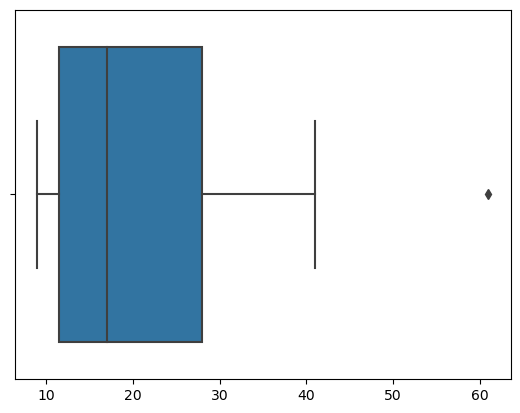

In [31]:
sns.boxplot(x)

<AxesSubplot:ylabel='Count'>

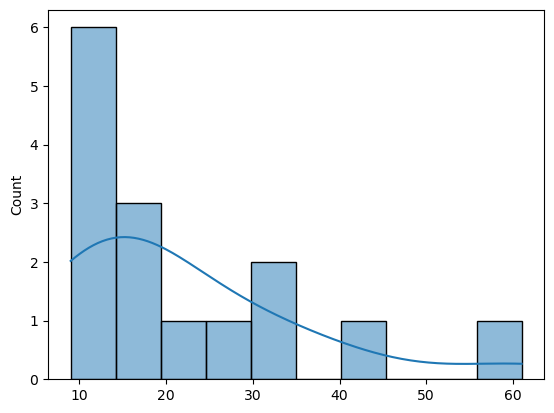

In [ ]:
sns.histplot(x, bins=10, kde=True)

Ejercicio:

Descargar el conjunto de datos de Iris y calcular los estadísticos descriptivos de las variables numéricas.

In [ ]:

# Cargamos el conjunto de datos
iris = sns.load_dataset('iris')

# Seleccionamos una columna para hacer los cálculos
column = iris['sepal_length'].tolist()

print("Media:", mean_fun(column))
print("Mediana:", median_fun(column))
print("Moda:", mode_fun(column))
print("Desviación media absoluta:", mad_fun(column))

Media: 5.843333333333335
Mediana: 5.8
Moda: [5.0]
Desviación media absoluta: 0.6875555555555557


Lo mismo se puede hacer con la función `describe()` de Pandas, que lo hace todo de una vez.

In [ ]:
import pandas as pd

iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:ylabel='Count'>

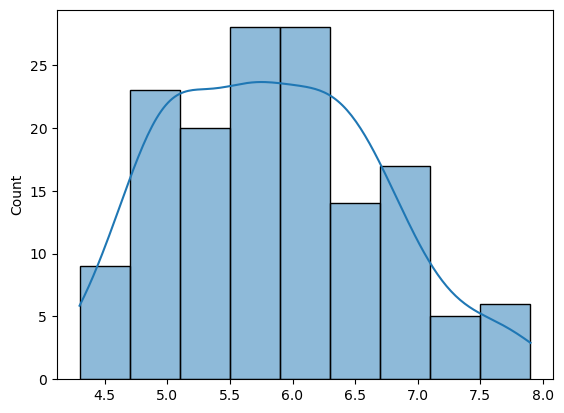

In [ ]:
sns.histplot(column, kde=True)

Tarea 1:

1. Descargar el conjunto de datos `winequality-red.csv`. Se puede descargar desde [aquí](https://archive.ics.uci.edu/dataset/186/wine+quality).
2. Indicar cuáles son las variables numéricas y cuáles son las categóricas.
3. Calcular los estadísticos descriptivos para la variable alcohol. Separarlos por estadísticos de tendencia central y de dispersión. Nota: ver cómo seleccioné una variable en el ejercicio de Iris.